# Importación de librerias

Calculamos y renderizamos las estadísticas descriptivas de cada cluster

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importación del Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")
df = pd.read_csv("/content/drive/MyDrive/DSA-2023/Modulo3/TP-Modulo3/Módulo III /winequality-red.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Análisis de datos

Un análisis previo nos ayudará a comprender mejor los datos, tomar decisiones informadas sobre qué características usar y cómo configurar el algoritmo de clusterización, y definir nuestro objetivos para el proceso de clusterización.

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
print("DataFrame:", df.shape)
print("Tipos de Datos: \n",df.dtypes)

DataFrame: (1599, 12)
Tipos de Datos: 
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
print("Búsqueda de valores null: \n",df.isnull().sum())

Búsqueda de valores null: 
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
#valores disitintos en la columna quality
df['quality'].nunique()

6

<Axes: xlabel='quality', ylabel='Count'>

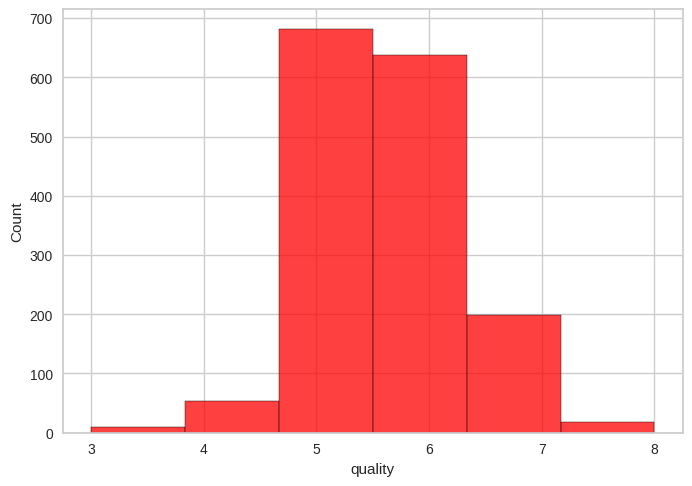

In [ ]:
sns.histplot(data=df, x='quality', bins=6, kde=False, color='red')

 Hacemos gráficos por pares. Tan solo pasamos un conjunto de datos en long-format, donde cada columna es una variable y cada fila un individuo.

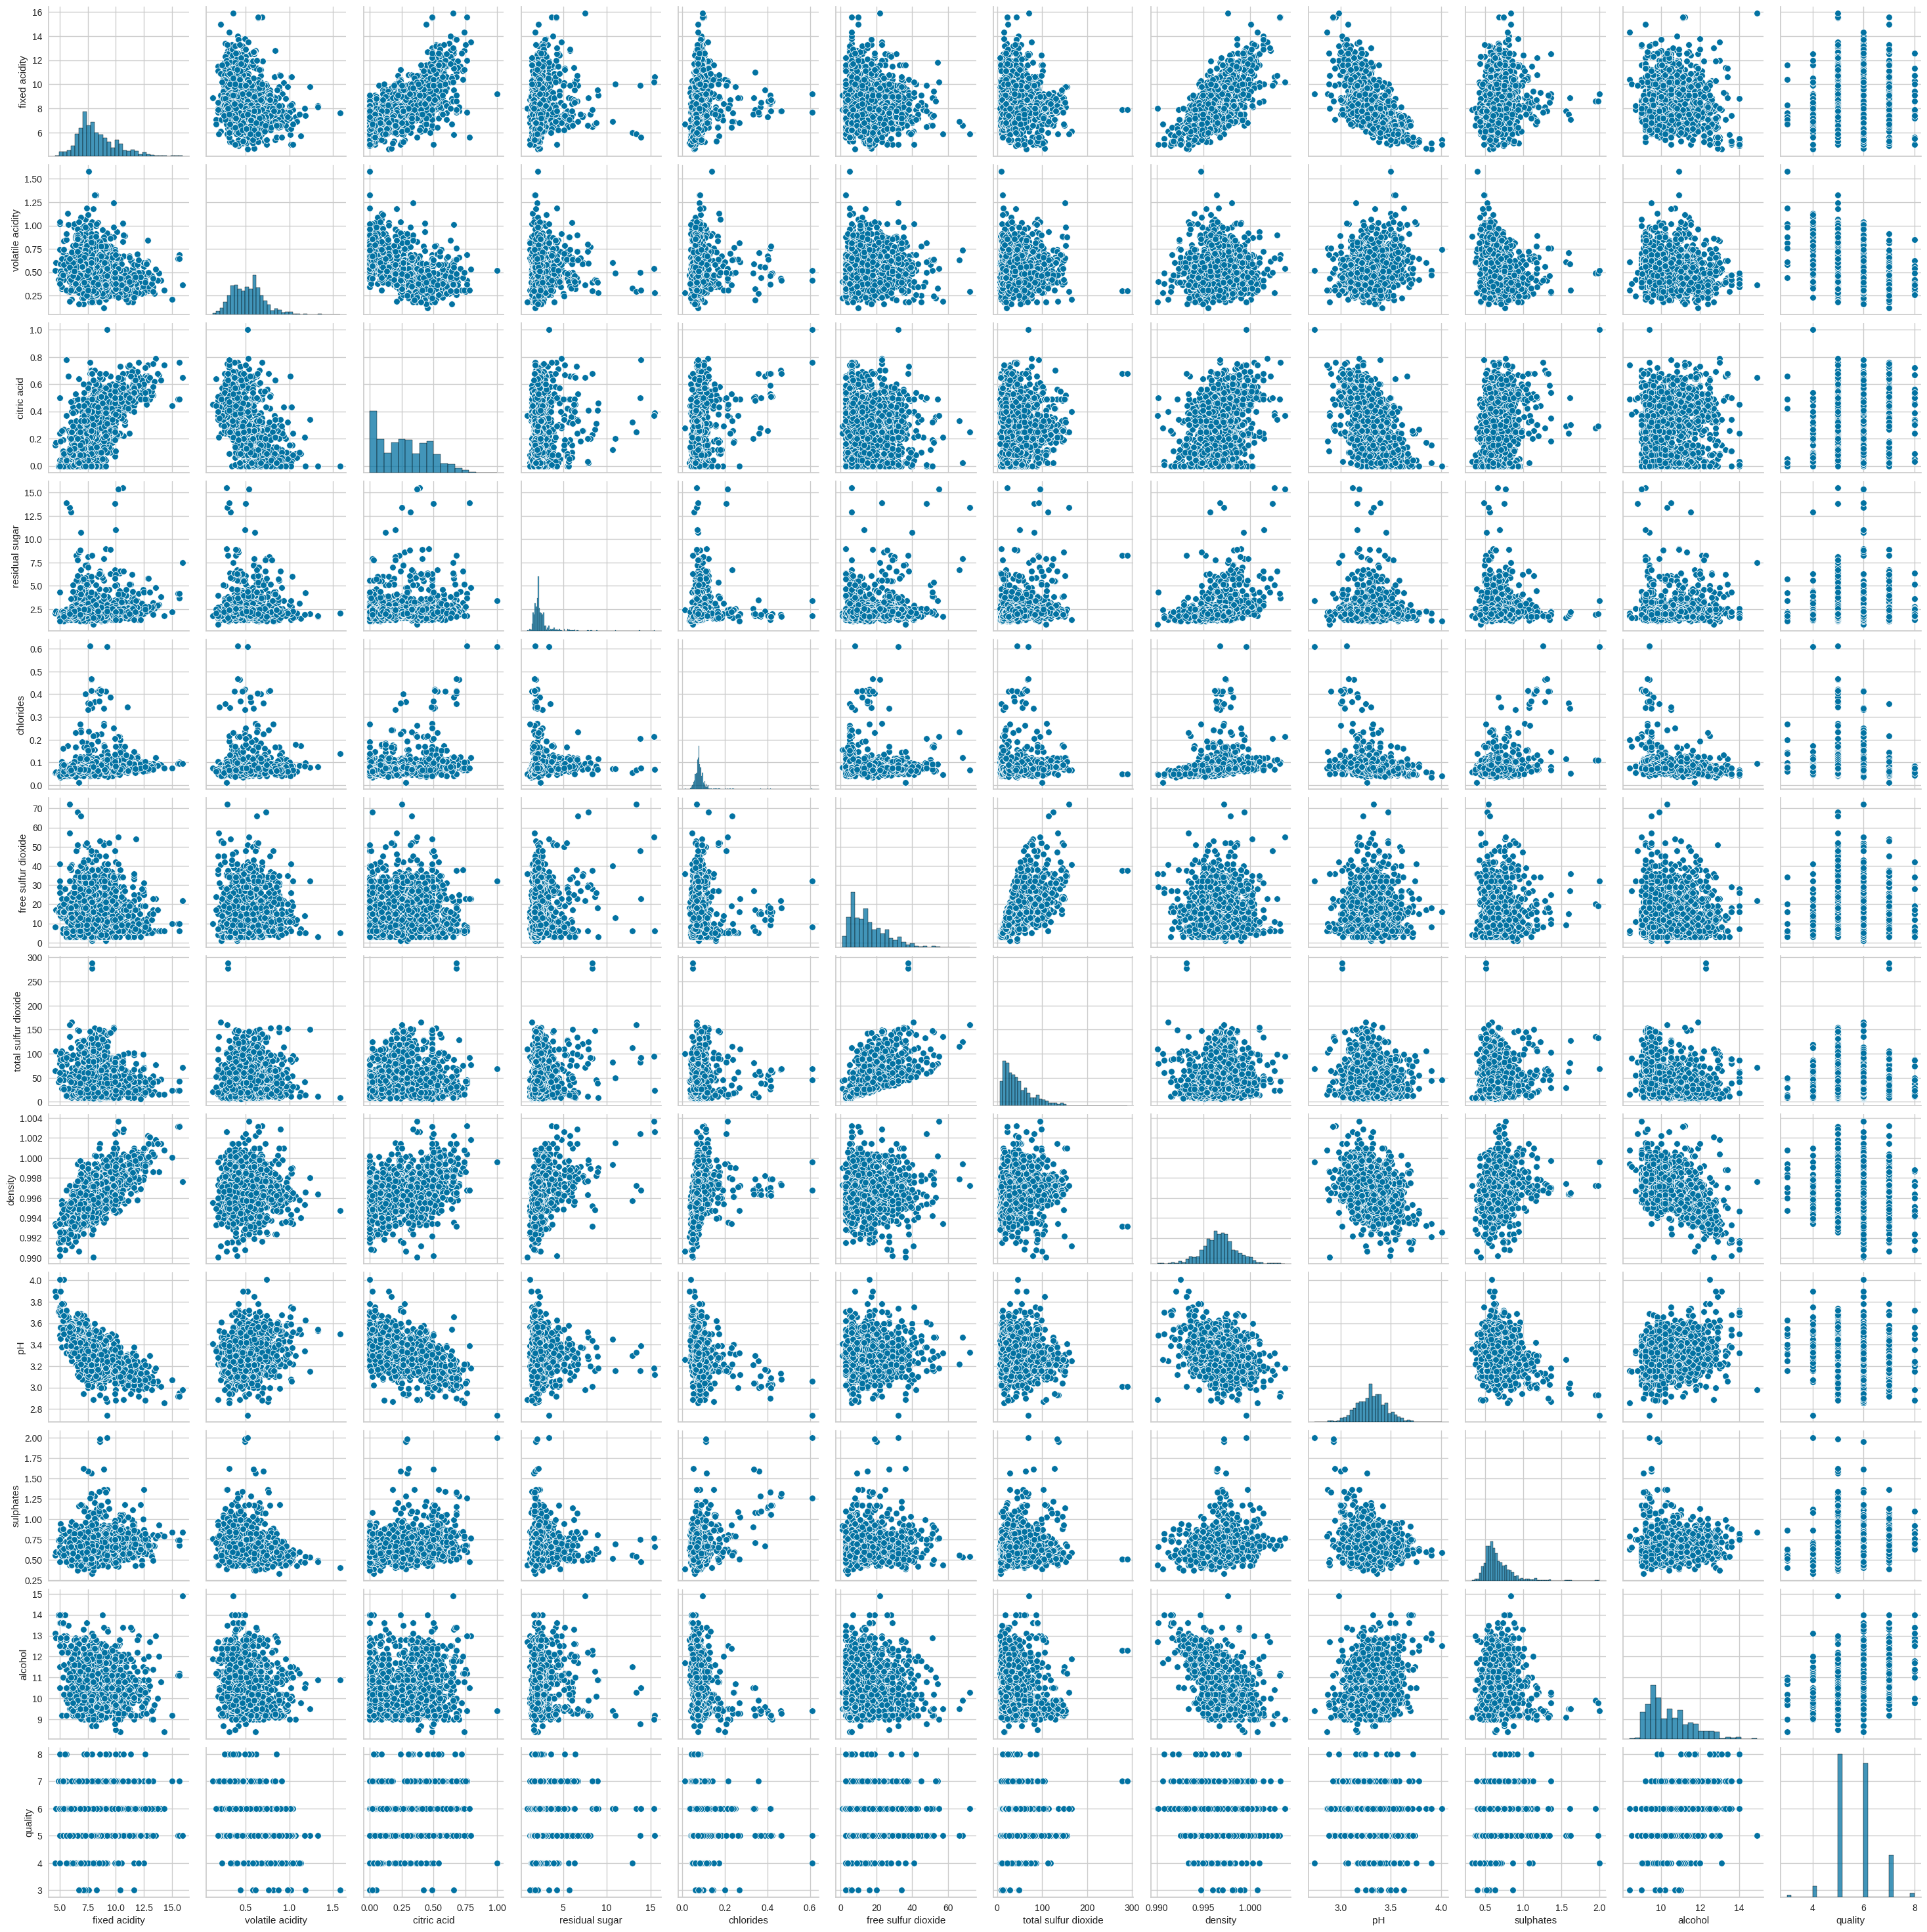

In [ ]:
sns_plot = sns.pairplot(df)

Mismos gráficos que arriba pero usando la propiedad "quality" como referencia en cada uno

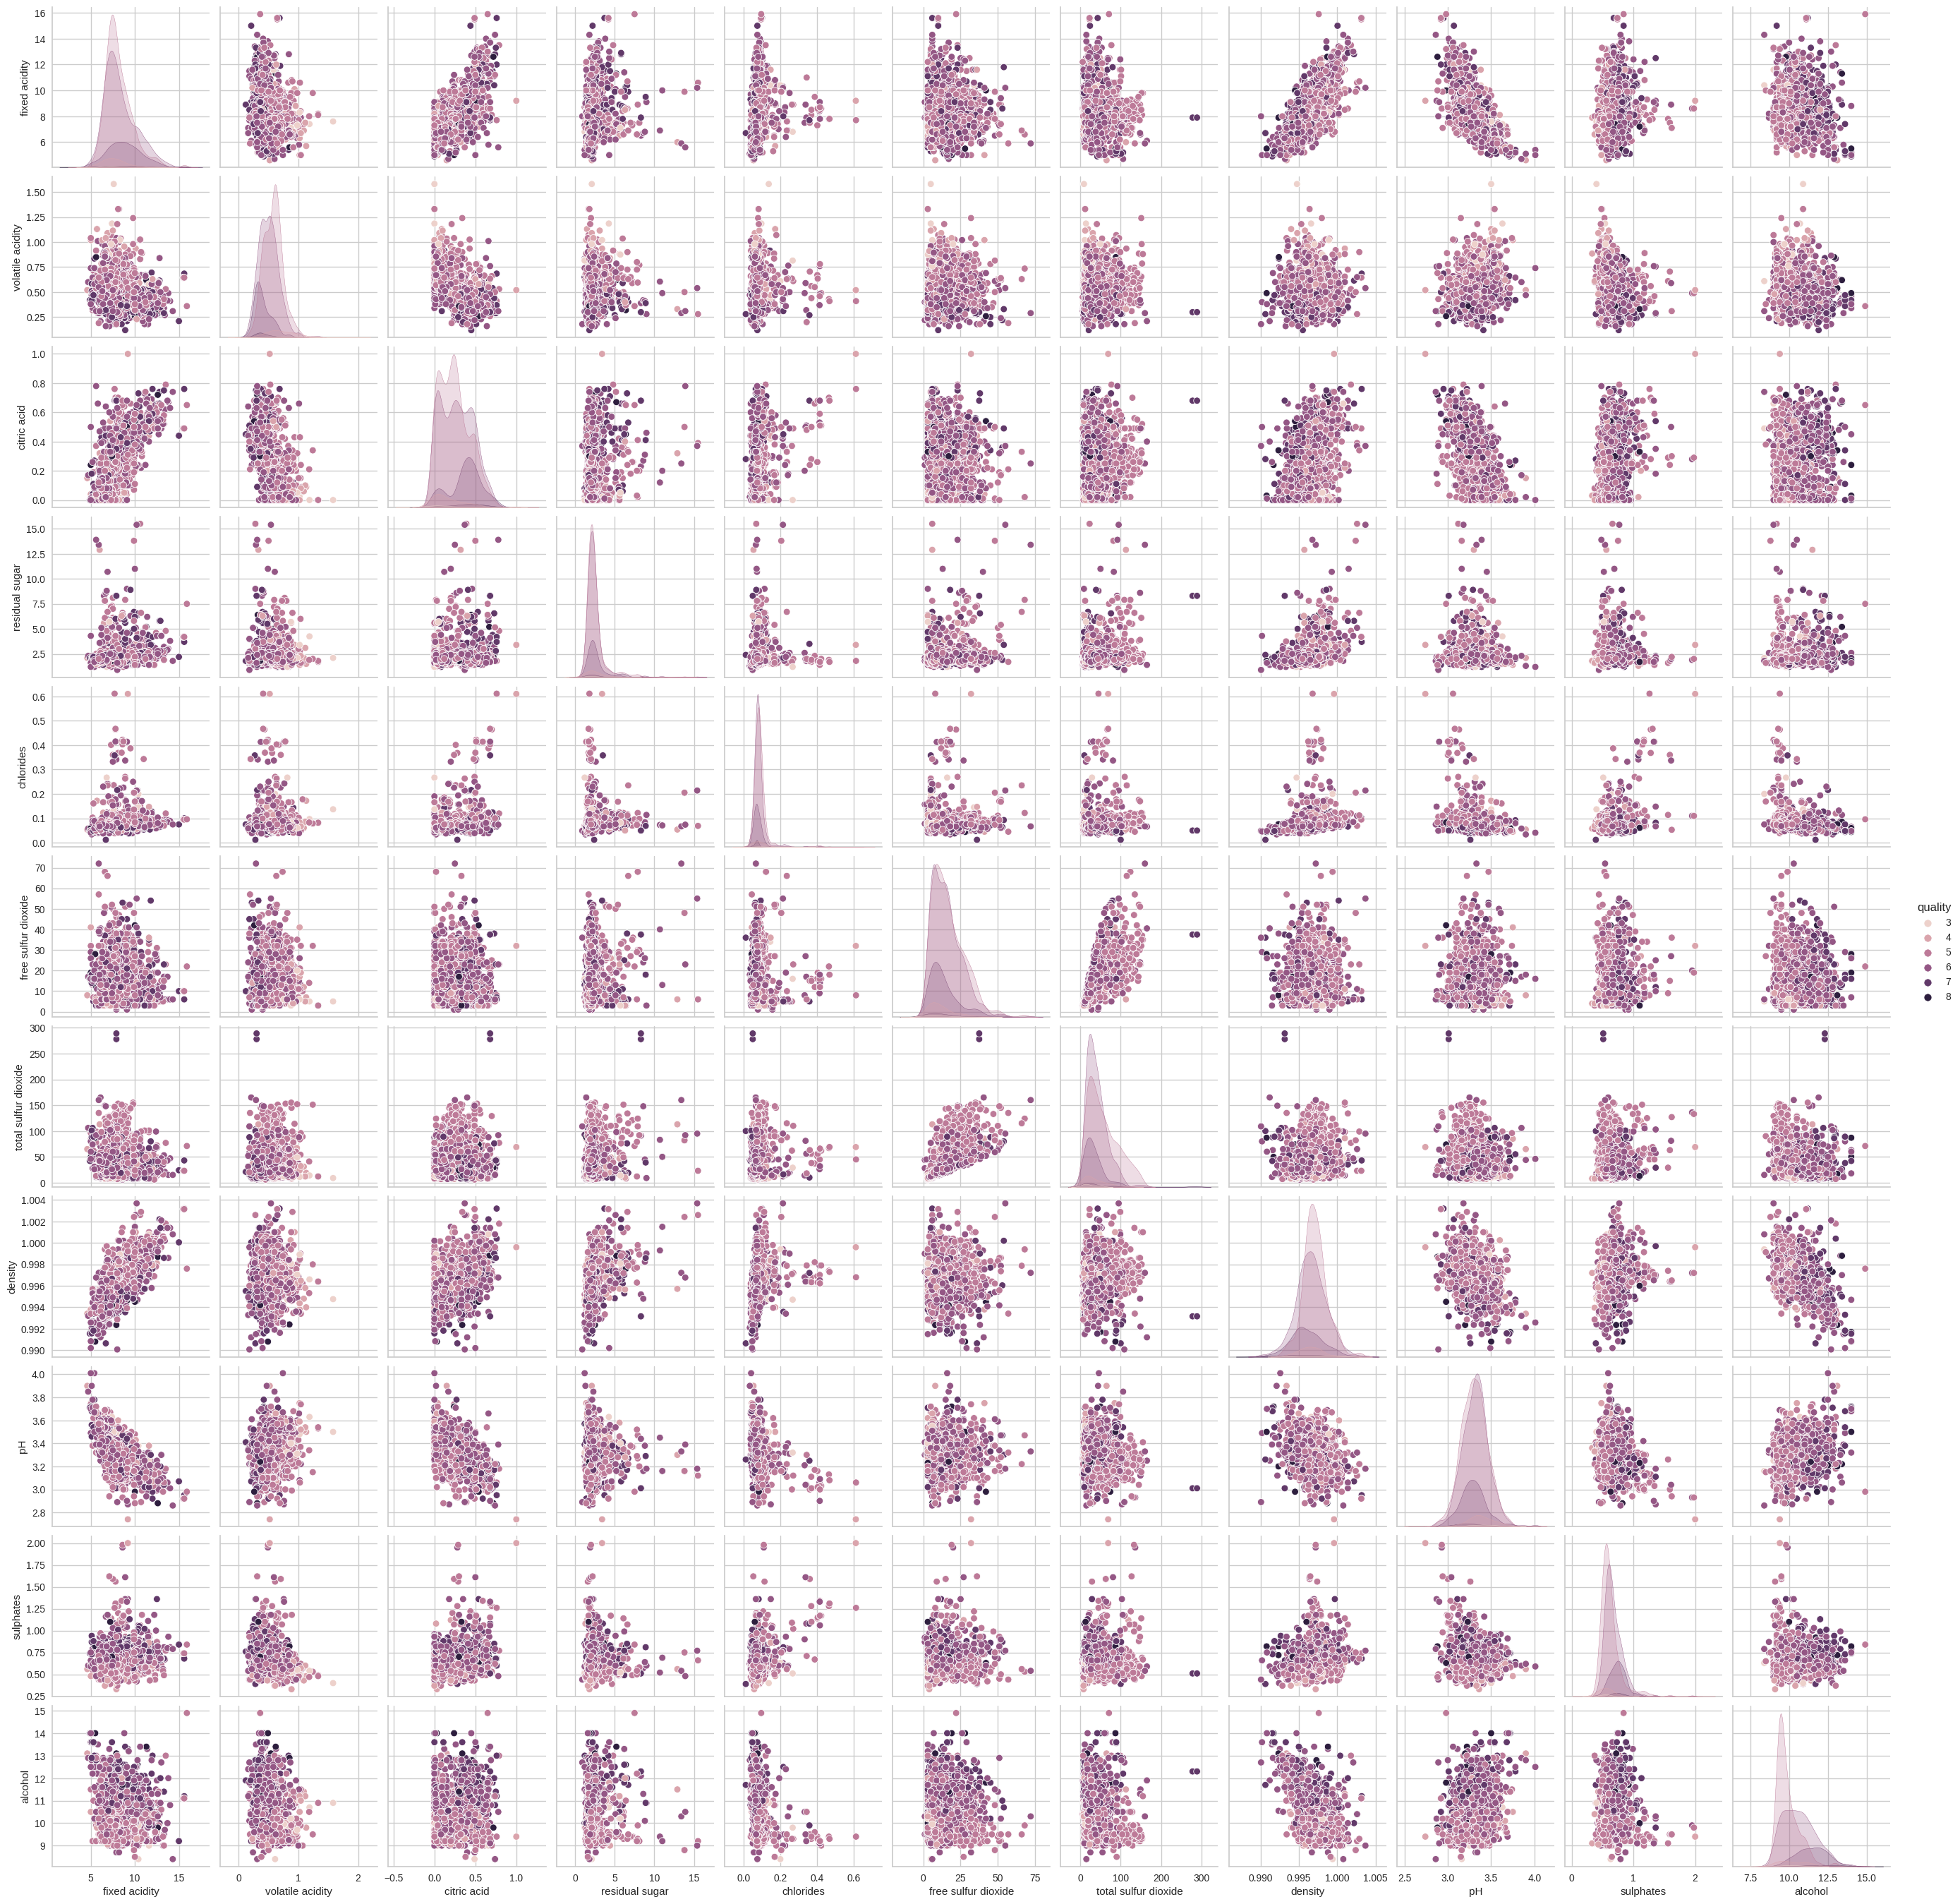

In [ ]:
sns.pairplot(df, hue='quality')
plt.show()

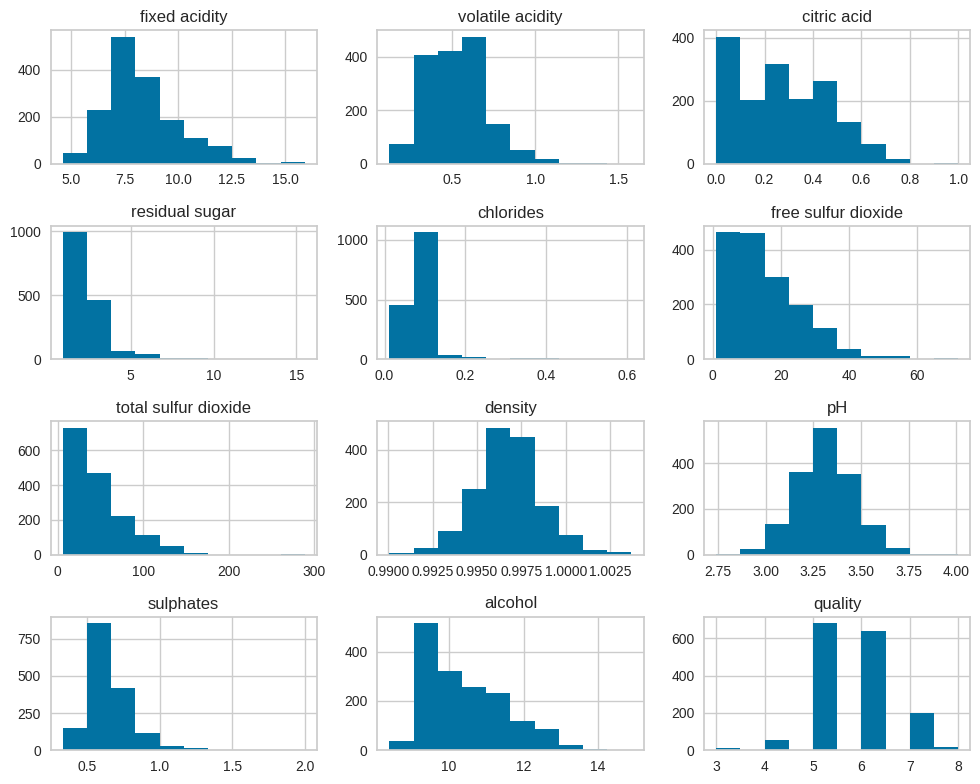

In [ ]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Matriz de correlación

 La matriz de correlación puede revelar si algunas características están altamente correlacionadas. Esto ayuda a entender mejor nuestros datos y a tomar decisiones informadas sobre qué características incluir en la clusterización.

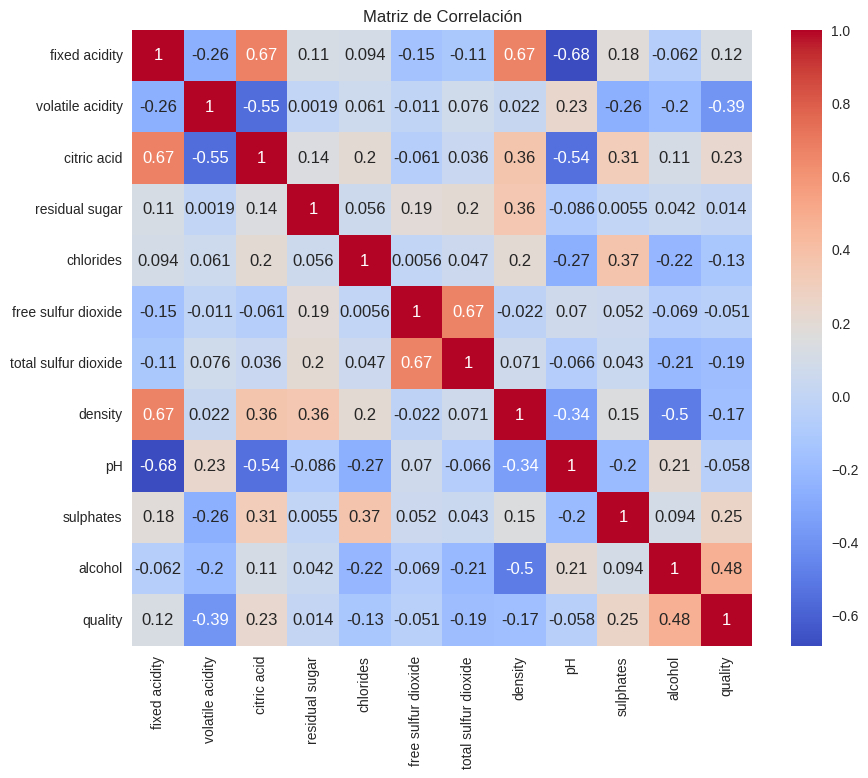

In [ ]:
#Mapa de calor de la matriz de correlación
corr_matrix=df.corr()
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

# Escalamiento de Datos

 El escalamiento es importante porque los algoritmos de clusterización, como K-means, se basan en la distancia entre puntos de datos para agruparlos en clústeres. Si las características tienen escalas diferentes, algunas características podrían dominar en la contribución a la distancia, lo que podría llevar a resultados sesgados en el proceso de clusterización

In [ ]:
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

In [ ]:
#escalamos los datos
scaling=StandardScaler()
scaled=scaling.fit_transform(df)

In [ ]:
scaled_df=pd.DataFrame(scaled,columns=df.columns)

# Conjunto de datos
scaled_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol   quality  
0 -0.960246 -0.787823  
1 -0.584777 -0.787823  
2 -0.584777 -0.787823  
3 -0.584777  0.450848  
4 -0.960246 -0.787823

# K-Means Clustering

K-means Clustering es el algoritmo de aprendizaje automático no supervisado más popular. Es un algoritmo basado en el centroide o en la distancia. El funcionamiento de los algoritmos es el siguiente:

* Primero inicializamos k puntos llamados medios aleatoriamente
* Luego categorizamos cada elemento a su media más cercana y actualizamos las coordenadas de la media, que son los promedios de los elementos categorizados en la media hasta el momento.
* Repetimos el proceso para un número dado de itarciones y al final tenemos nuestros clusters.

Para decidir cuántos grupos considerar, vamos a utilizar el método de codo más popular

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 40, n_init='auto')
kmeans.fit(scaled_df)

KMeans(n_clusters=3, n_init='auto', random_state=40)

In [ ]:
clusters=kmeans.predict(scaled_df)
print(clusters)

[2 0 2 ... 2 2 2]


## Analisis de Componentes Principales
 Técnica de reducción de dimensionalidad utilizada en estadísticas y aprendizaje automático.

In [ ]:
pca = PCA(n_components=2)  # Elijo el número de componentes principales que deseo
pca_result = pca.fit_transform(scaled_df)

In [ ]:
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

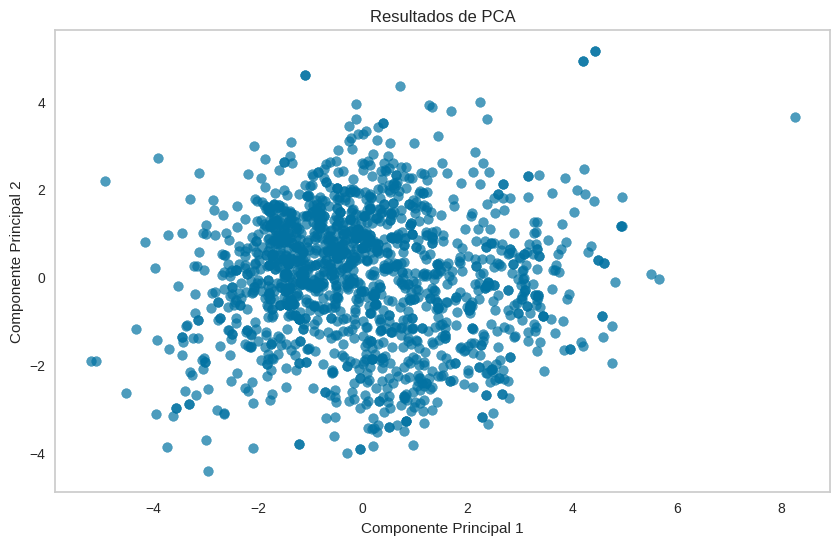

In [ ]:
# Visualizar los resultados de PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de PCA')
plt.grid()
plt.show()

In [ ]:
pca_df

PC1       PC2
0    -1.779442  1.157303
1    -1.004185  2.071838
2    -0.915783  1.393434
3     2.404077 -0.213792
4    -1.779442  1.157303
...        ...       ...
1594 -2.241991  0.599594
1595 -2.122456 -0.370101
1596 -1.366265 -0.517561
1597 -2.367147  0.703545
1598 -0.288776 -1.240846

[1599 rows x 2 columns]

## Grafico Curva del Codo

La curva del codo se representa trazando el número de clústeres en el eje x y la suma de cuadrados intraclúster (WCSS) en el eje y. WCSS es una medida de cuánta variabilidad hay dentro de cada clúster, y su reducción generalmente indica que los puntos están más cerca de los centroides de los clústeres

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

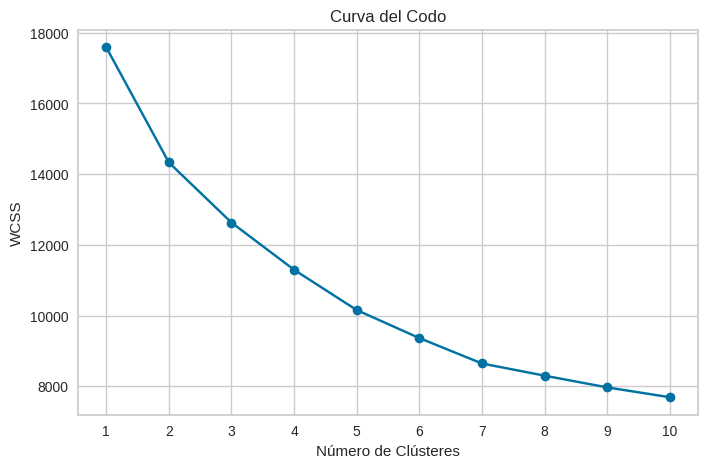

In [ ]:
import numpy as np
X = scaled_df.iloc[:, :-1]  # Todas las columnas excepto "quality"

# Calcular la suma de cuadrados intraclúster (WCSS) para diferentes valores de k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Curva del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()

El punto en el que la inercia comienza a disminuir más lentamente se considera el "codo" y suele ser un buen candidato para el número óptimo de clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

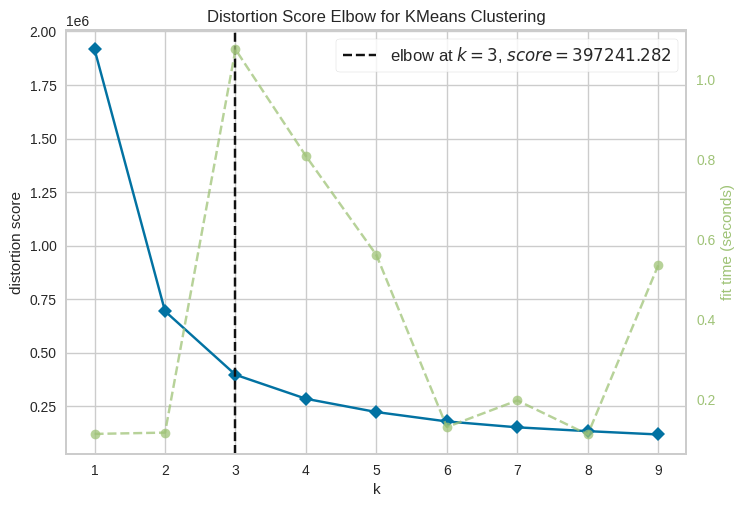

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(1, 10))
elbow.fit(df)
k_value = elbow.elbow_value_
elbow.show()

Como podemos ver, la flexión del codo o la rodilla está en 3. Entonces, seleccionamos 3 como el numero de clusters a utilizar.


## Coeficiente de Silueta
Es una métrica de evaluación de clústeres que se utiliza para medir la calidad de la agrupación resultante en un análisis de clusterización. Esta métrica proporciona una medida de cuán cerca están los puntos de datos de su propio clúster en comparación con otros clústeres cercanos.

In [ ]:
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

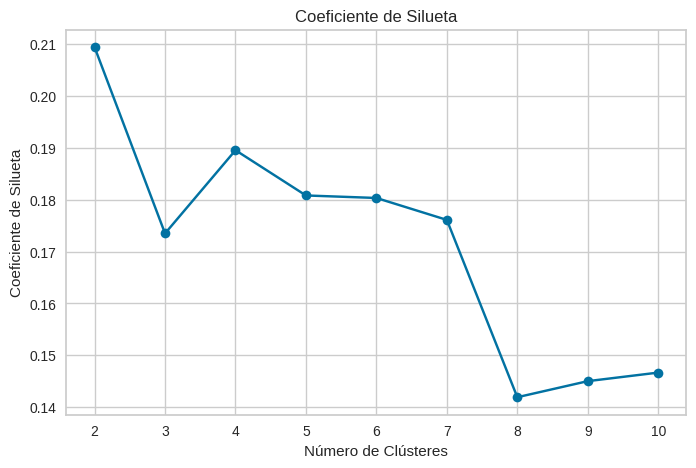

In [ ]:
# Calcular el coeficiente de silueta para diferentes valores de k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Graficar los coeficientes de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(range(2, 11))
plt.show()

El objetivo es encontrar el valor de k que maximiza el coeficiente de silueta, lo que indica una agrupación más coherente y bien separada.
* Pico más Alto: Busca el valor de k que tiene el coeficiente de silueta más alto en el gráfico. Este pico indica que los clústeres están bien separados y cohesionados.

* Pico Único: Si hay un solo pico significativo en el gráfico y no hay otros picos cercanos, ese valor de k puede considerarse óptimo.

* Mayor Coeficiente: Aunque no siempre hay un pico muy prominente, es posible que desees elegir el valor de k con el coeficiente de silueta más alto.

* Coeficiente Positivo: Asegúrate de que el coeficiente de silueta para el valor de k elegido sea positivo. Los valores negativos indican que los puntos se han asignado incorrectamente a los clústeres.

Dado que el dataset "Wine Quality - Red" no necesariamente se creó con la intención de tener una estructura de clústeres natural, los resultados podrían variar y no siempre habrá un valor de k óptimo claramente definido.

In [ ]:
#calcular el coeficiente de silueta para K=3
silhouette_score(scaled_df, kmeans.labels_)

0.14666506304839402

# Predicción

In [ ]:
kmeans = KMeans(n_clusters = k_value, random_state = 40, n_init='auto')
kmeans.fit(scaled_df)

KMeans(n_clusters=3, n_init='auto', random_state=40)

In [ ]:
#cuenta el número de registros en cada clúster
pd.Series(kmeans.labels_).value_counts()

2    726
1    477
0    396
dtype: int64

In [ ]:
#valores predictivos
cluster_labels = kmeans.fit_predict(scaled_df)
print(cluster_labels)

[2 0 2 ... 2 2 2]


In [ ]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  KMeans_Clusters  
0      9.4        5                2  
1      9.8        5                0  
2      9.8        5                2  
3      9.8        6                1  
4      9.4        5                2  
5      9.4        5                2  
6      9.4        5                2  
7     10.0        7                2  
8      9.5        7                2  
9     10.5        5                0

In [ ]:
num_clusters = len(kmeans_df['KMeans_Clusters'].unique())
print("Número de clústeres:", num_clusters)

Número de clústeres: 3


In [ ]:
#save a kmeans file
kmeans_df.to_csv('/content/drive/MyDrive/kmeans_result.csv',index=False)

# Visualización de clústeres

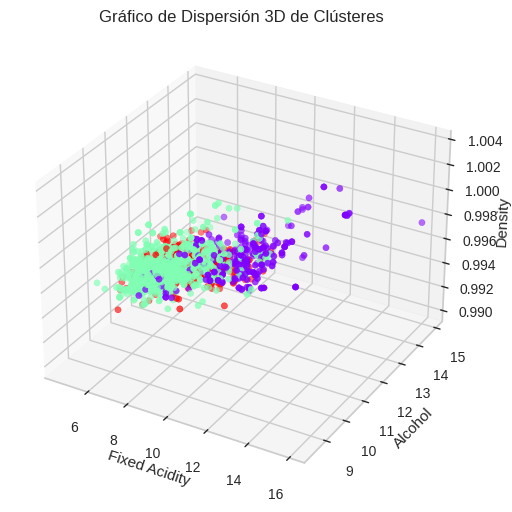

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['fixed acidity'], X['alcohol'], X['density'], c=labels, cmap='rainbow')
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Density')
ax.set_title('Gráfico de Dispersión 3D de Clústeres')
plt.show()

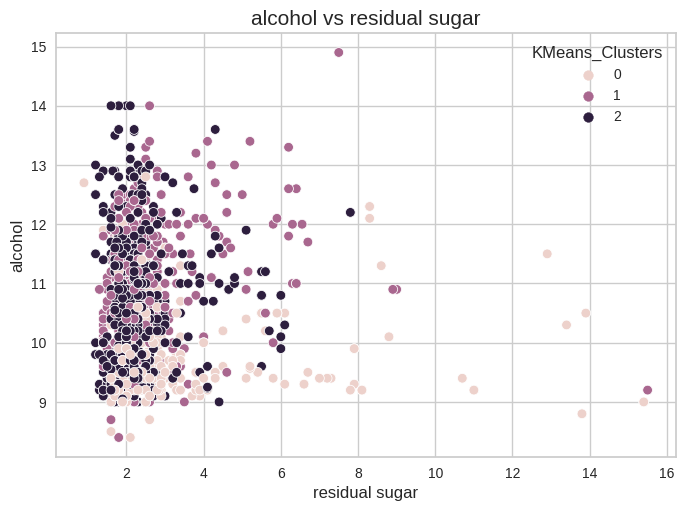

In [ ]:
sns.scatterplot(x=kmeans_df['residual sugar'],y=kmeans_df['alcohol'], hue='KMeans_Clusters', data=kmeans_df)
plt.title("alcohol vs residual sugar", fontsize=15)
plt.xlabel("residual sugar", fontsize=12)
plt.ylabel("alcohol", fontsize=12)
plt.show()

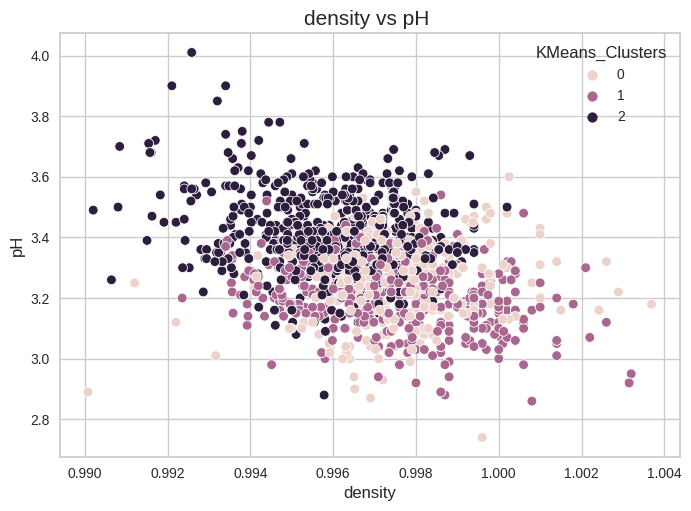

In [ ]:
#visulization of clusters density vs ph
sns.scatterplot(x=kmeans_df['density'],y=kmeans_df['pH'],hue='KMeans_Clusters',data=kmeans_df)
plt.title("density vs pH ", fontsize=15)
plt.xlabel("density", fontsize=12)
plt.ylabel("pH", fontsize=12)
plt.show()

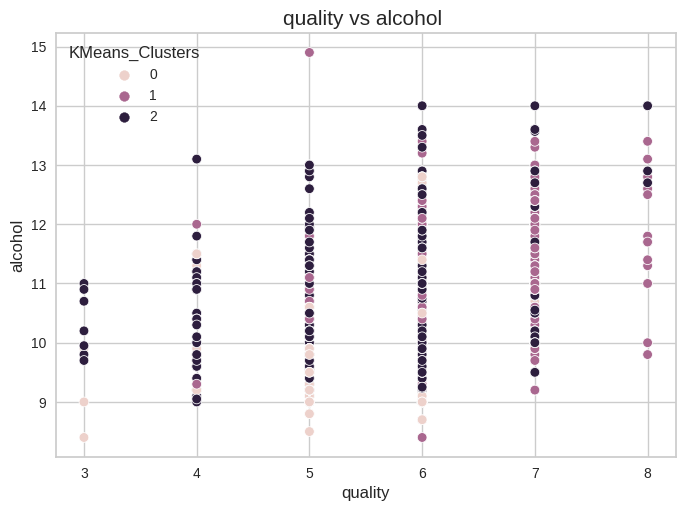

In [ ]:
#visulization of clusters density vs ph
sns.scatterplot(x=kmeans_df['quality'],y=kmeans_df['alcohol'],hue='KMeans_Clusters',data=kmeans_df)
plt.title("quality vs alcohol ", fontsize=15)
plt.xlabel("quality", fontsize=12)
plt.ylabel("alcohol", fontsize=12)
plt.show()

## Clusterizar por Acidez

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
features = df[['fixed acidity', 'volatile acidity']]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
kmeans = KMeans(n_clusters=3)  # Elegir el número de clusters
df['KMeans_Clusters'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


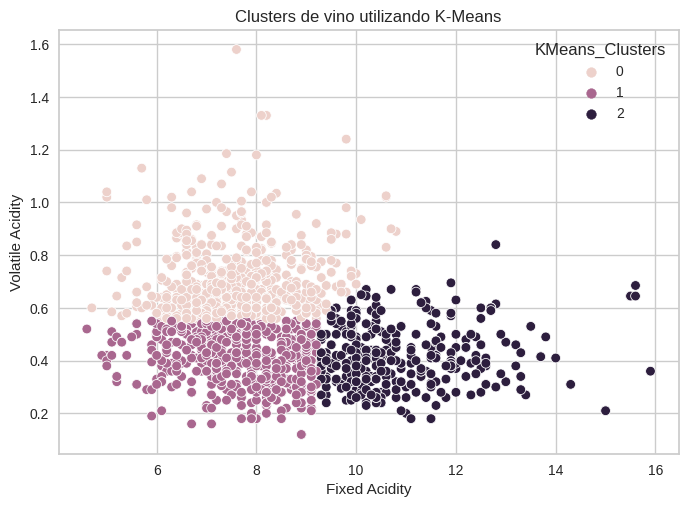

In [ ]:
# Visualización de los clusters utilizando Seaborn
sns.scatterplot(data=df, x='fixed acidity', y='volatile acidity', hue='KMeans_Clusters')
plt.title("Clusters de vino utilizando K-Means")
plt.xlabel("Fixed Acidity")
plt.ylabel("Volatile Acidity")
plt.show()

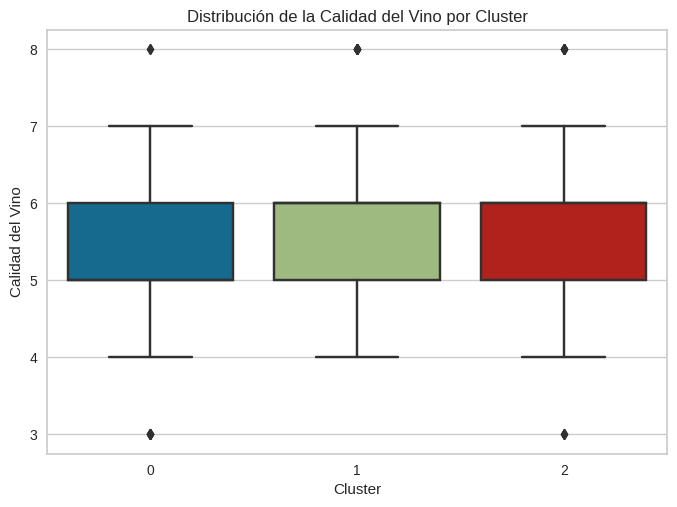

In [ ]:
sns.boxplot(data=df, x='KMeans_Clusters', y='quality')
plt.title("Distribución de la Calidad del Vino por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Calidad del Vino")
plt.show()

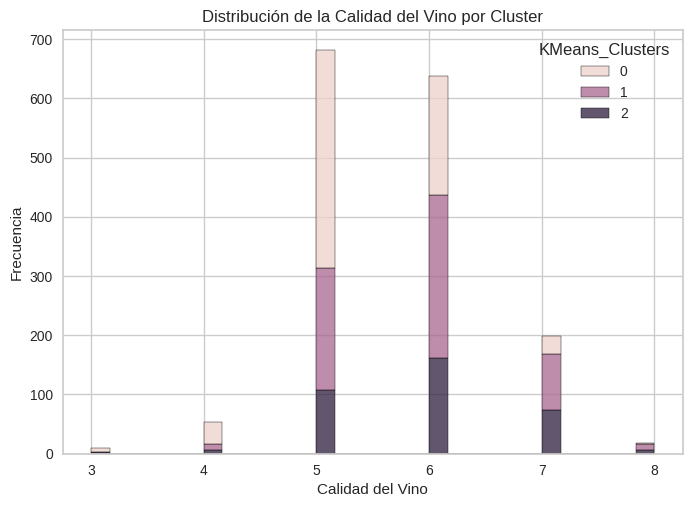

In [ ]:
sns.histplot(data=df, x='quality', hue='KMeans_Clusters', multiple='stack')
plt.title("Distribución de la Calidad del Vino por Cluster")
plt.xlabel("Calidad del Vino")
plt.ylabel("Frecuencia")
plt.show()

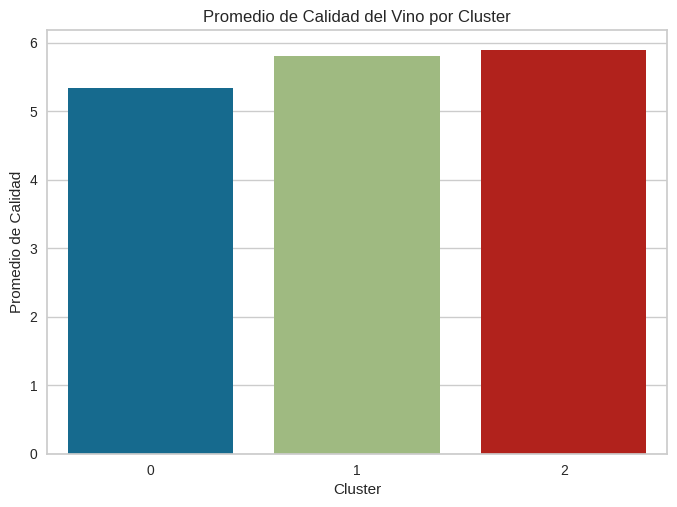

In [ ]:
avg_quality_by_cluster = df.groupby('KMeans_Clusters')['quality'].mean()
sns.barplot(x=avg_quality_by_cluster.index, y=avg_quality_by_cluster.values)
plt.title("Promedio de Calidad del Vino por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Promedio de Calidad")
plt.show()

# Clustering Jerárquico

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
X = df.iloc[:, :-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


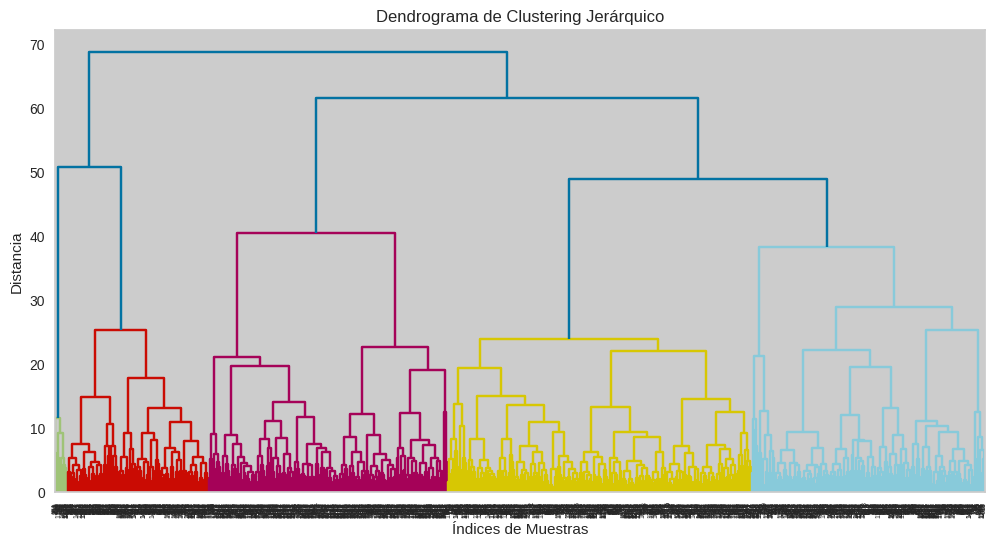

In [ ]:
# Ejecutar Clustering Jerárquico
n_clusters = 3  # Número de clústeres deseados
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(X_scaled)

# Crear un dendrograma para visualizar la jerarquía de clústeres
plt.figure(figsize=(12, 6))
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índices de Muestras')
plt.ylabel('Distancia')
plt.show()

## Visualizacion de clusteres

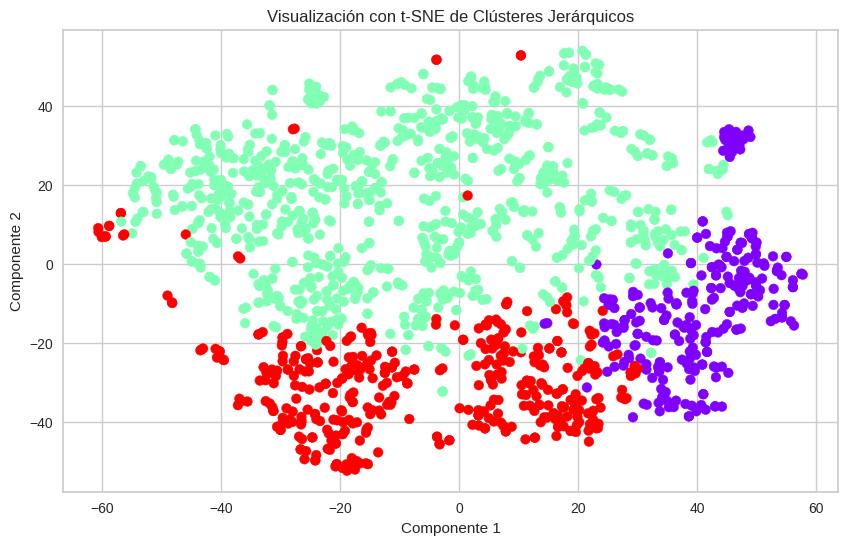

In [ ]:
# Visualizar los clústeres en un gráfico de dispersión (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualización con t-SNE de Clústeres Jerárquicos')
plt.show()

In [ ]:
print(X_tsne[:, 0], X_tsne[:, 1])

[-33.98943  -25.80266  -26.079247 ... -12.469875 -40.681877   4.34341 ] [ 22.453379  32.11146   31.006891 ... -27.55749  -23.695261 -25.419342]


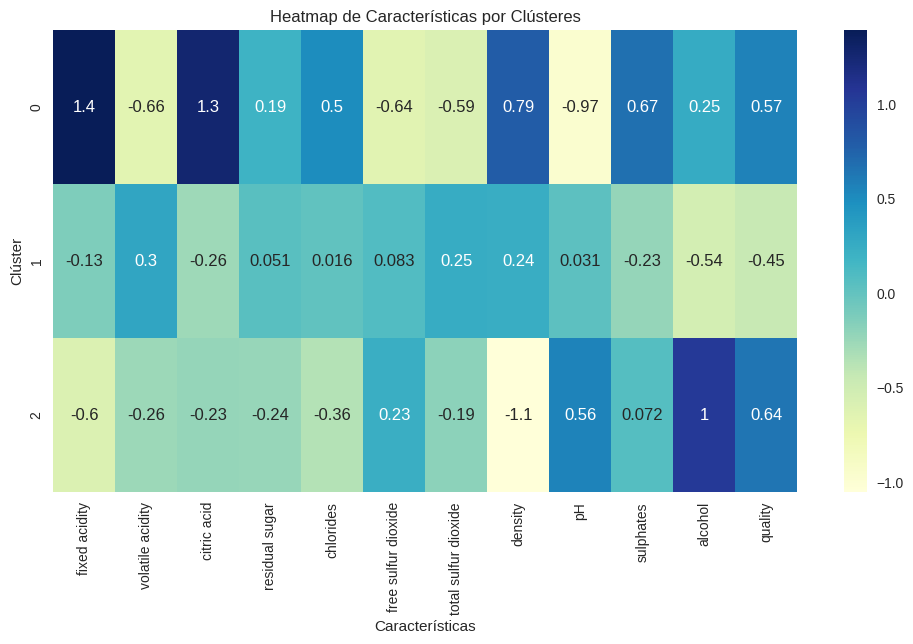

In [ ]:
# Crear un DataFrame con las características escaladas y las etiquetas de clúster
cluster_data = pd.DataFrame(X_scaled, columns=X.columns)
cluster_data['Cluster'] = labels

# Calcular las medias de características por clúster
cluster_means = cluster_data.groupby('Cluster').mean()

# Crear un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap='YlGnBu', annot=True)
plt.title('Heatmap de Características por Clústeres')
plt.xlabel('Características')
plt.ylabel('Clúster')
plt.show()

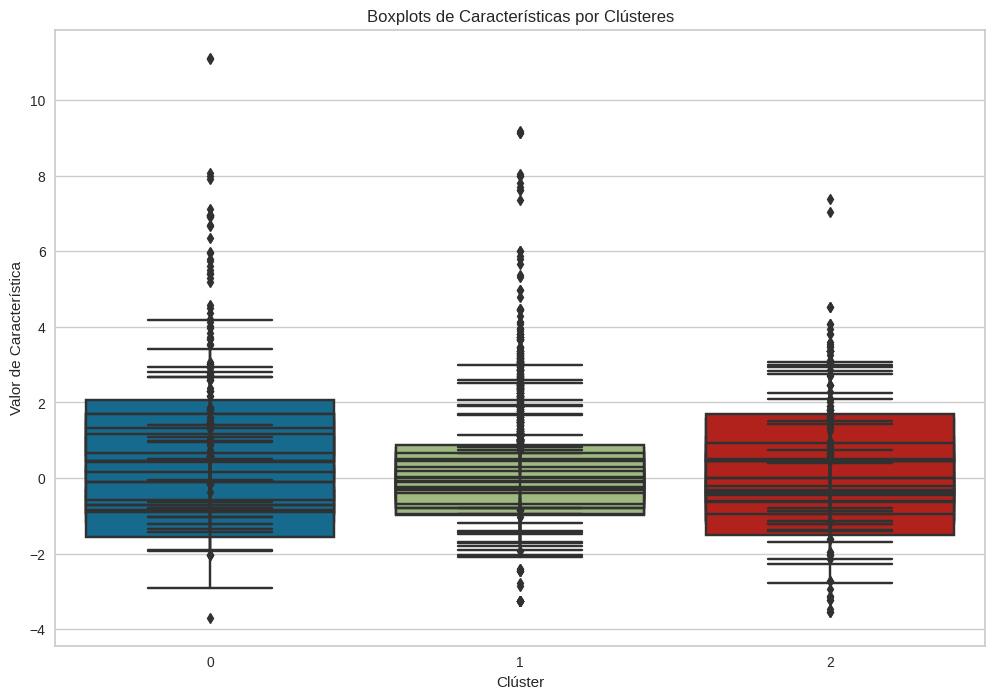

In [ ]:
# Crear boxplots
plt.figure(figsize=(12, 8))
for feature in X.columns:
    sns.boxplot(x='Cluster', y=feature, data=cluster_data)
plt.title('Boxplots de Características por Clústeres')
plt.xlabel('Clúster')
plt.ylabel('Valor de Característica')
plt.xticks(range(n_clusters), labels=range(n_clusters))
plt.show()

Calculamos y renderizamos las estadísticas descriptivas de cada cluster

In [ ]:
cluster_stats = scaled_df.groupby(clusters).describe()

for cluster_num in range(len(cluster_stats)):
    print("Estadísticas para el Cluster", cluster_num)
    print(cluster_stats.loc[cluster_num])
    print("\n")

Estadísticas para el Cluster 0
fixed acidity  count    396.000000
               mean      -0.008961
               std        0.657023
               min       -1.562514
               25%       -0.470907
                           ...    
quality        min       -3.265165
               25%       -0.787823
               50%       -0.787823
               75%        0.450848
               max        1.689519
Name: 0, Length: 96, dtype: float64


Estadísticas para el Cluster 1
fixed acidity  count    477.000000
               mean       0.989509
               std        0.986937
               min       -1.102890
               25%        0.275983
                           ...    
quality        min       -2.026494
               25%        0.450848
               50%        0.450848
               75%        1.689519
               max        2.928190
Name: 1, Length: 96, dtype: float64


Estadísticas para el Cluster 2
fixed acidity  count    726.000000
               mean      -

Calculamos la calidad promedio, buscamos el cluster con la mejor calidad promedio e imprimimos el resultado

In [ ]:
cluster_quality_avg = scaled_df.groupby(clusters)['quality'].mean()

best_cluster = cluster_quality_avg.idxmax()

print("Cluster con la mejor calidad promedio:", best_cluster)
print("Calidad promedio:", cluster_quality_avg[best_cluster])

Cluster con la mejor calidad promedio: 1
Calidad promedio: 0.6144464110453233


Calculamos las medias de las características para cada cluster y luego las visualizamos en un gráfico de barras

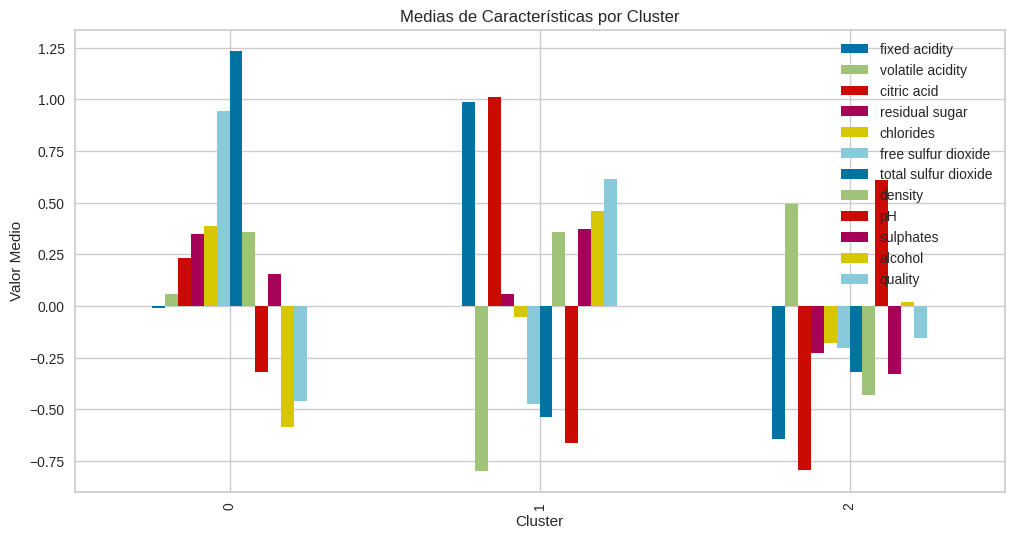

In [ ]:
cluster_means = scaled_df.groupby(clusters).mean()

cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Medias de Características por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Medio')
plt.show()